# Milestone 1
## Introduction
- Name: Izzan Dienurrahman
- Batch: HCK-003

## Objective
- Predicting customer's churn score (whether or not they stop using our product/service)

## Problem Statements
- Dataset loading
- Identifying unnecessary features
- Identifying relevant features towards the target prediction
- Handling missing values and outliers
- Constructing data pipeline
- Defining ANN model
- Evalating the model
- Tuning the model
- Reevaluate the model
- Saving best model

## Dataset Desciription
Dataset name : `churn.csv`

| Column | Description |
| --- | --- |
| `user_id` | ID of a customer |
| `age` | Age of a customer |
| `gender` | Gender of a customer |
| `region_category` | Region that a customer belongs to |
| `membership_category` | Category of the membership that a customer is using |
| `joining_date` | Date when a customer became a member |
| `joined_through referral` | Whether a customer joined using any referral code or ID |
| `preferred_offer types` | Type of offer that a customer prefers |
| `medium_of operation` | Medium of operation that a customer uses for transactions |
| `internet_option` | Type of internet service a customer uses |
| `last_visit_time` | The last time a customer visited the website |
| `days_since_last_login` | Number of days since a customer last logged into the website |
| `avg_time_spent` | Average time spent by a customer on the website |
| `avg_transaction_value` | Average transaction value of a customer |
| `avg_frequency_login_days` | Number of times a customer has logged in to the website |
| `points_in_wallet` | Points awarded to a customer on each transaction |
| `used_special_discount` | Whether a customer uses special discounts offered |
| `offer_application_preference` | Whether a customer prefers offers |
| `past_complaint` | Whether a customer has raised any complaints |
| `complaint_status` | Whether the complaints raised by a customer was resolved |
| `feedback` | Feedback provided by a customer |
| `churn_risk_score` | Churn score <br><br> `0` : Not churn <br> `1` : Churn |

## Importing Libraries
The followings are necessary python libraries in order for this project to work.

In [94]:
# import library yang dibutuhkan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix
import pandas as pd
import numpy  as np
import seaborn as sns; sns.set()
import joblib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import initializers
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Data Loading

In [95]:
# set max display column
pd.set_option('display.max_columns', 100)

In [96]:
# read data train & data test
df = pd.read_csv('datasets/churn.csv')

In [97]:
df.head() # menampilkan 5 data teratas

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


Dataset terdiri dari kolom numerikal dan kategorikal

In [98]:
df.tail() # menampilkan 5 data terbawah

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.93,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

There are missing values in columns: `gender`, `region_category`, `joined_through_referral`, `preferred_offer_types`, and `medium_of_operation`

In [100]:
# drop unnecessary column
df.drop(columns=['user_id','joining_date','last_visit_time'],inplace=True)

In [101]:
df.apply(pd.unique)

age                             [29, 50, 26, 63, 64, 35, 43, 15, 49, 53, 33, 2...
gender                                                                [F, M, nan]
region_category                                        [nan, City, Village, Town]
membership_category             [No Membership, Basic Membership, Silver Membe...
joined_through_referral                                            [Yes, nan, No]
preferred_offer_types           [Without Offers, Credit/Debit Card Offers, Gif...
medium_of_operation                              [nan, Desktop, Smartphone, Both]
internet_option                                 [Wi-Fi, Fiber_Optic, Mobile_Data]
days_since_last_login           [4, 11, 8, 10, 9, 20, 3, 5, 2, 14, 12, 19, 17,...
avg_time_spent                  [1184.49, 338.15, 235.14, 56.67, 153.99, 1397....
avg_transaction_value           [38604.69, 7665.66, 37671.69, 15678.14, 8422.6...
avg_frequency_login_days        [10.0, 17.0, 5.0, 11.0, 0.0, 28.0, 24.0, 29.0,...
points_in_wallet

In [102]:
df.membership_category.unique()

array(['No Membership', 'Basic Membership', 'Silver Membership',
       'Premium Membership', 'Gold Membership', 'Platinum Membership'],
      dtype=object)

There are 6 kinds of membership categories

In [103]:
df.preferred_offer_types.unique()

array(['Without Offers', 'Credit/Debit Card Offers',
       'Gift Vouchers/Coupons', nan], dtype=object)

There are 3 kinds of preferred offer types

In [104]:
df.complaint_status.unique()

array(['No Information Available', 'Not Applicable', 'Unsolved', 'Solved',
       'Solved in Follow-up'], dtype=object)

There are 5 types of complaint status

In [105]:
df.feedback.unique()

array(['Poor Website', 'Poor Customer Service', 'Too many ads',
       'Poor Product Quality', 'No reason specified',
       'Products always in Stock', 'Reasonable Price',
       'Quality Customer Care', 'User Friendly Website'], dtype=object)

There are 9 types of feedback

In [106]:
df.days_since_last_login.unique()

array([   4,   11,    8,   10,    9,   20,    3,    5,    2,   14,   12,
         19,   17,    7,   13,   15,    6,   22,   16,   18,   25, -999,
         24,   23,    1,   21,   26])

There is a negative value which is -999, I assume this means that the customer has logged in recently on that day.

In [107]:
# negative value will be replaced to 0 to make it computable in phik correlation matrix
# it also helps with reducing skewness and overall distribution
df.days_since_last_login.replace(-999,0,inplace=True)

In [108]:
# menampilkan standar missing value pada masing masing kolom
df.isnull().sum()

age                                0
gender                            59
region_category                 5431
membership_category                0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [109]:
# print missing values percentage
for i,j in zip(df.columns, df.isnull().sum()):
    print(f'{i} {j/len(df):.2%}')

age 0.00%
gender 0.16%
region_category 14.67%
membership_category 0.00%
joined_through_referral 14.70%
preferred_offer_types 0.78%
medium_of_operation 14.58%
internet_option 0.00%
days_since_last_login 0.00%
avg_time_spent 0.00%
avg_transaction_value 0.00%
avg_frequency_login_days 0.00%
points_in_wallet 0.00%
used_special_discount 0.00%
offer_application_preference 0.00%
past_complaint 0.00%
complaint_status 0.00%
feedback 0.00%
churn_risk_score 0.00%


Column `gender` & `preferred_offer_types`  has a relatively small missing values which can be trimmed, while `region_category`, `joined_through_referral`, and `medium_of_operation` have lots of missing values which will be imputed.

In [110]:
# drop missing value train set
df.dropna(inplace=True)

In [111]:
# show missing values
df.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [112]:
# cek data yang memiliki duplikat
n_data_duplicate = df.duplicated().sum()
print(f"Jumlah data duplikat sebanyak {n_data_duplicate} entri")

Jumlah data duplikat sebanyak 11 entri


In [113]:
# drop duplicate data
df.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

In [114]:
# show dataframe
df.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
3,63,F,Village,No Membership,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,10,56.67,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
7,15,M,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,8,34.07,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
9,35,F,Town,Basic Membership,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,5,106.23,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1
11,33,M,Town,Platinum Membership,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,11,74.38,23695.52,0.0,832.42000,Yes,No,Yes,Unsolved,Reasonable Price,0
14,36,F,City,Gold Membership,No,Without Offers,Desktop,Wi-Fi,19,31.39,76602.41,8.0,763.82000,Yes,No,No,Not Applicable,Reasonable Price,0


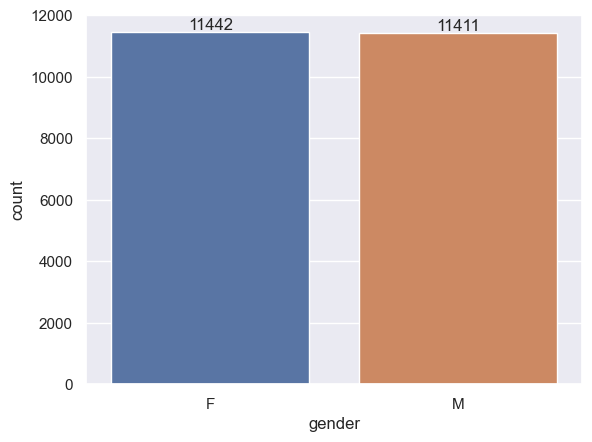

In [115]:
# plot gender
ax = sns.countplot(x=df.gender, data=df)
ax.bar_label(ax.containers[0])
plt.show()

Customer of gender male & female count is relatively balanced

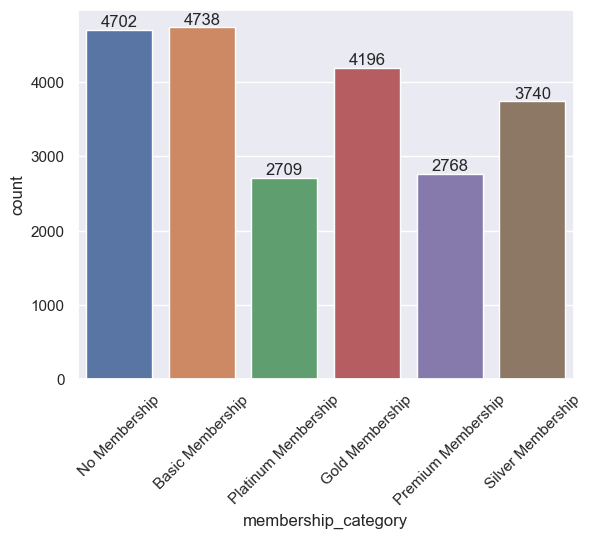

In [116]:
# plot membership_category
ax = sns.countplot(x=df.membership_category, data=df,orient='h')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

Most customer seems to have no membership and basic membership

In [117]:
df[['gender','avg_time_spent']].groupby(by='gender').mean()

,avg_time_spent
gender,
F,284.646902
M,275.922950


Both male and female has similar average time spent on the website.

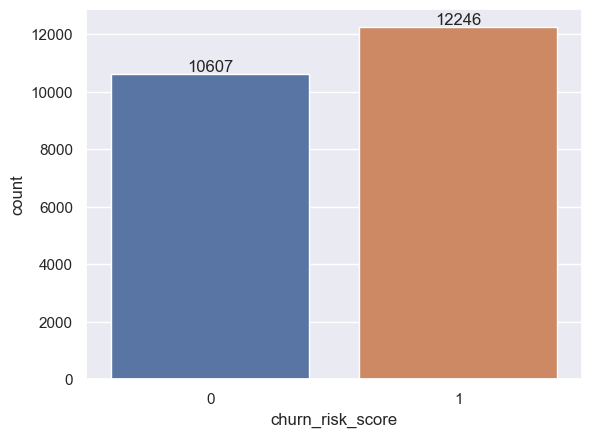

In [118]:
# plot churn risk
ax = sns.countplot(x=df.churn_risk_score, data=df,orient='h')
ax.bar_label(ax.containers[0])
plt.show()

more than 50% of our customers is labeled as churn but overall the target label is quite balanced

In [119]:
# keep track of categorical column
cat_col = df.select_dtypes(include='object').columns.to_list()
cat_col

['gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [120]:
# keep track of numerical column as well
num_col = df.select_dtypes(include='number').columns.to_list()
num_col

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet',
 'churn_risk_score']

In [121]:
# construct titles for plotting
scaled_num_col = num_col # all num col will be scaled
titles = []
for i in range(len(scaled_num_col)):
    titles.append(scaled_num_col[i]+' Distribution')

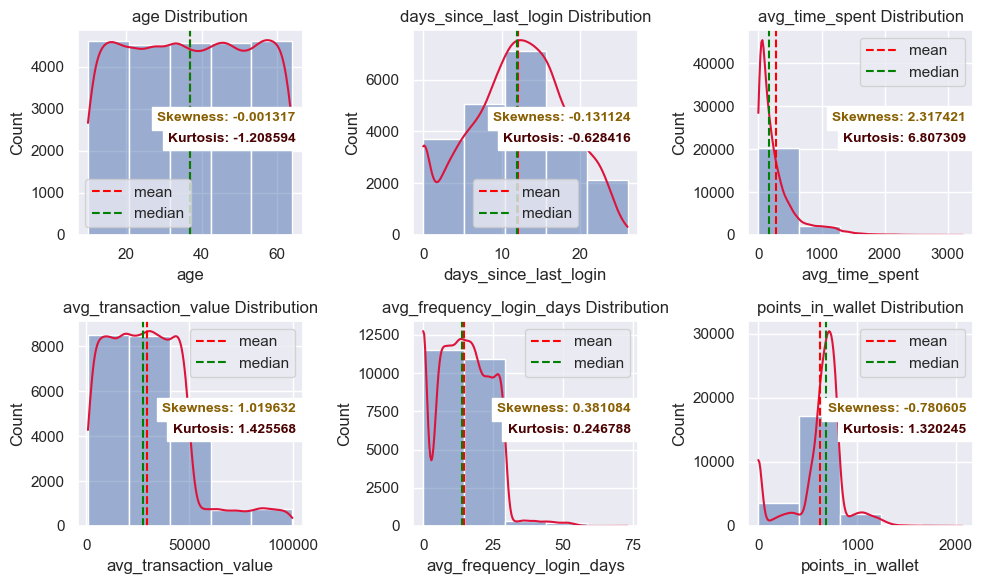

In [122]:
def plot_dist_num_col(df,row_num,col_num,scaled_num_col,figsize):
    # plot distribusi kolom numerik
    fig, axes= plt.subplots(row_num,col_num, figsize=figsize)

    # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.8)
    x=0
    for i in range(row_num):
        for j in range(col_num):
            sns.histplot(ax=axes[i][j], data=df[scaled_num_col[x]], kde=True, bins=5)
            axes[i][j].set_title(titles[x])
            axes[i][j].lines[0].set_color('crimson')
            axes[i][j].axvline(df[scaled_num_col[x]].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
            axes[i][j].axvline(df[scaled_num_col[x]].median(), color = 'green', linestyle = 'dashed', label = 'median')
            axes[i][j].legend()
            axes[i][j].text(x=0.97, y=0.60, transform=axes[i][j].transAxes, s="Skewness: %f" % df[scaled_num_col[x]].skew(),\
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='xkcd:poo brown')
            axes[i][j].text(x=0.97, y=0.50, transform=axes[i][j].transAxes, s="Kurtosis: %f" % df[scaled_num_col[x]].kurt(),\
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='xkcd:dried blood')
            x+=1
    plt.tight_layout()

# plot all distribution for numerical data
plot_dist_num_col(df=df,row_num=2,col_num=3,scaled_num_col=scaled_num_col,figsize=(10,6))

`age`, `avg_transaction_value`, and `days_since_last_login` looks normally distributed while others are skewed.

## Feature Engineering

### Feature Selection

#### Phi_K Correlation Test

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


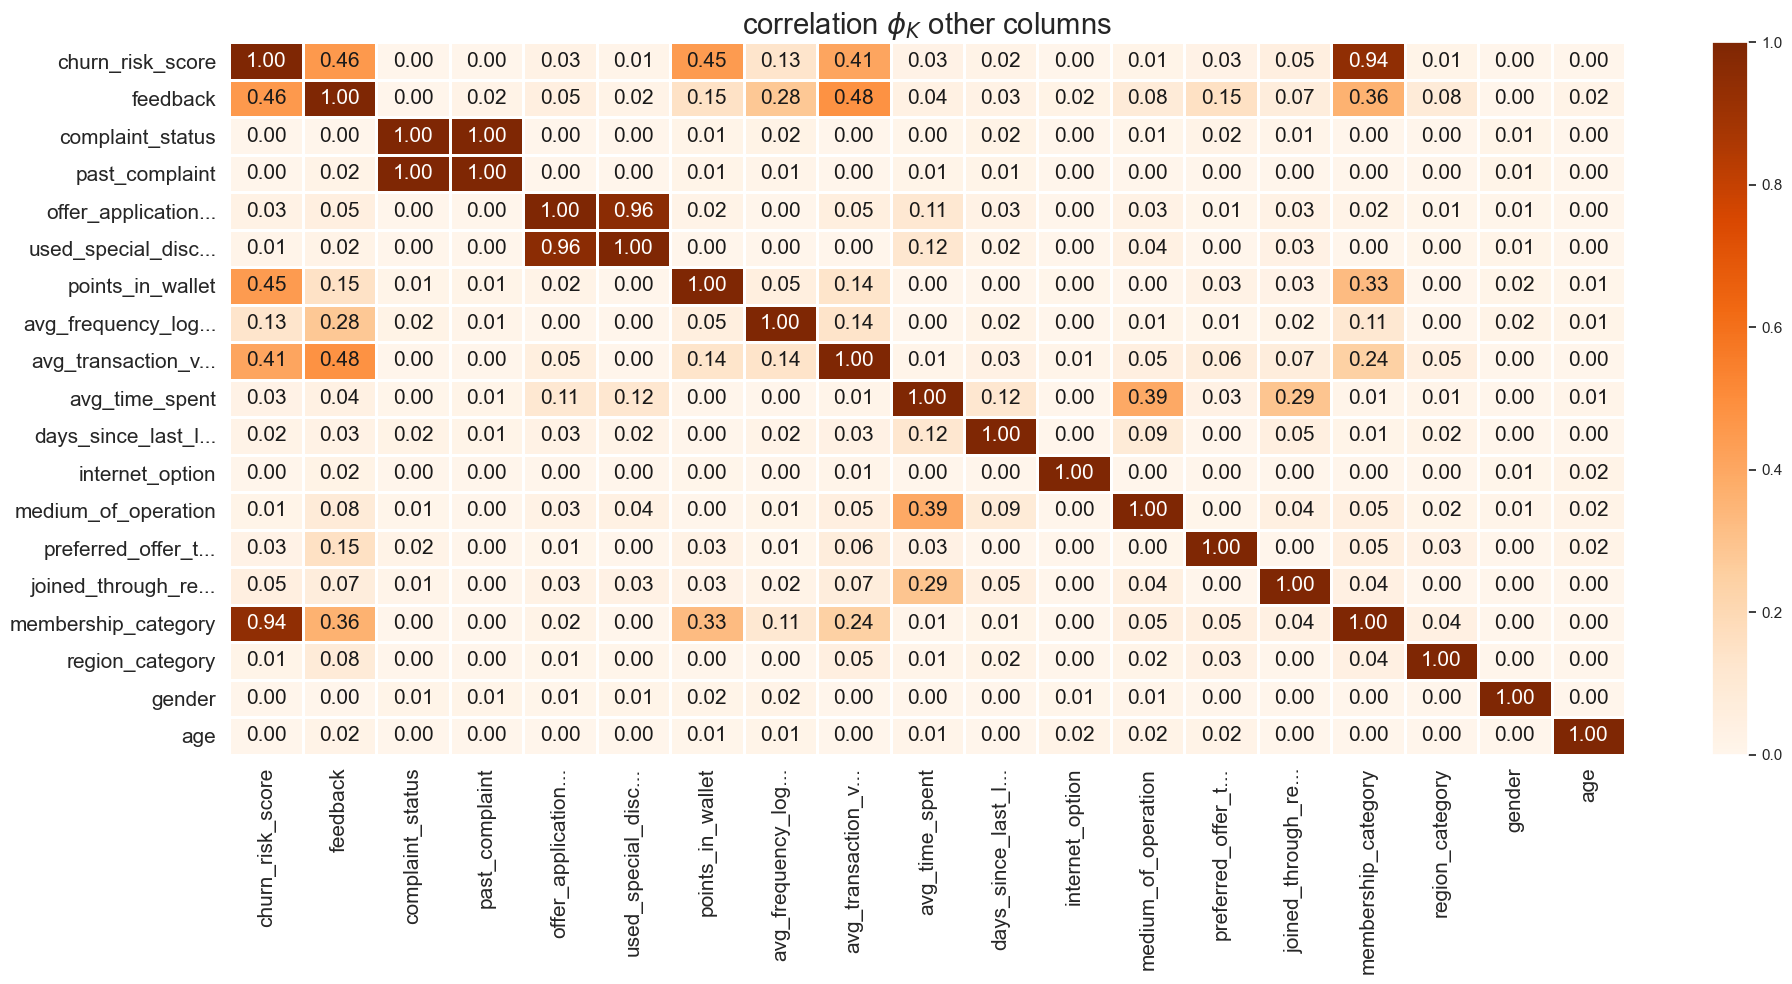

In [123]:
# get the phi_k correlation matrix between all variables
phik_matrix = df.phik_matrix()
plot_correlation_matrix(phik_matrix.values, 
                        x_labels=phik_matrix.columns, 
                        y_labels=phik_matrix.index, 
                        vmin=0, vmax=1, color_map="Oranges", 
                        title=r"correlation $\phi_K$ other columns", 
                        fontsize_factor=1.5, 
                        figsize=(20,10))
plt.tight_layout()

In [124]:
# cek korelasi yang memiliki signifikansi terhadap death_event
df.phik_matrix().churn_risk_score.sort_values(ascending=False)

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


churn_risk_score                1.000000
membership_category             0.941939
feedback                        0.456001
points_in_wallet                0.446729
avg_transaction_value           0.409086
avg_frequency_login_days        0.130753
joined_through_referral         0.049069
offer_application_preference    0.029454
avg_time_spent                  0.026375
preferred_offer_types           0.025170
days_since_last_login           0.018549
medium_of_operation             0.014012
region_category                 0.013638
used_special_discount           0.008745
gender                          0.000000
internet_option                 0.000000
past_complaint                  0.000000
complaint_status                0.000000
age                             0.000000
Name: churn_risk_score, dtype: float64

Based on phik matrix, features such as : `gender`, `internet_option`, `past_complain`, `complain_status`, and `age` doesn't have any correlation to churn score

In [125]:
a = df.phik_matrix(interval_cols=['days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']).churn_risk_score

In [126]:
dropped_experimental = a[a<0.1].index.to_list()

In [127]:
dropped_features = ['gender','internet_option','past_complaint','complaint_status','age']
df.drop(columns=dropped_experimental,inplace=True)

In [128]:
# create inference data
df_infer = df.sample(n=10,random_state=42)
df_infer.drop(columns='churn_risk_score').to_csv('datasets/infer.csv',index=False)
df.drop(index=df_infer.index,inplace=True)
df.reset_index(drop=True,inplace=True)

## Data Preprocessing
Here, we preprocess the data such that it is clean and ready to be trained. This includes but not limited to: `splitting` the data, `handling outliers` in train data (we want our train data to be as clean as possible in order to make a good model), `scaling` and `encoding` the data. 

### Train-Val-Test Split
Data is split into 3 parts: train-set, validation-set, and test-set

In [129]:
#assign data train & data test
X = df.drop(columns='churn_risk_score')
y = df['churn_risk_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

### Outlier Handling
Outlier will be `trimmed` if the total less than `5%` else we will `cap/censor` it.

#### Outlier Profiling
Profiles which outlier should be trimmed and or censored

In [130]:
# keep track of numerical column as well
num_col = X_train.select_dtypes(include='number').columns.to_list()
num_col

['avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']

In [131]:
# keep track of categorical column as well
cat_col = X_train.select_dtypes(include='object').columns.to_list()
cat_col

['membership_category', 'feedback']

In [132]:
# fungsi untuk membuat histogram dan boxplot dari suatu fitur
def plot_diagnostic(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=10)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1], whis=1.5, orient='h')
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' is normally distributed".format(col))
    elif df[col].skew() > 0.5 and df[col].skew() <= 1 :
        print("Columns '{}' is moderately right skewed".format(col))
    elif df[col].skew() > 1:
        print("Columns '{}' is highly right skewed".format(col))
    elif df[col].skew() < -0.5 and df[col].skew() >= -1 :
        print("Columns '{}' is moderately left skewed".format(col))
    elif df[col].skew() < -1:
        print("Columns '{}' is highly left skewed".format(col))

In [133]:
# fungsi untuk mendapatkan upper dan lower boundary dari suatu distribusi
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

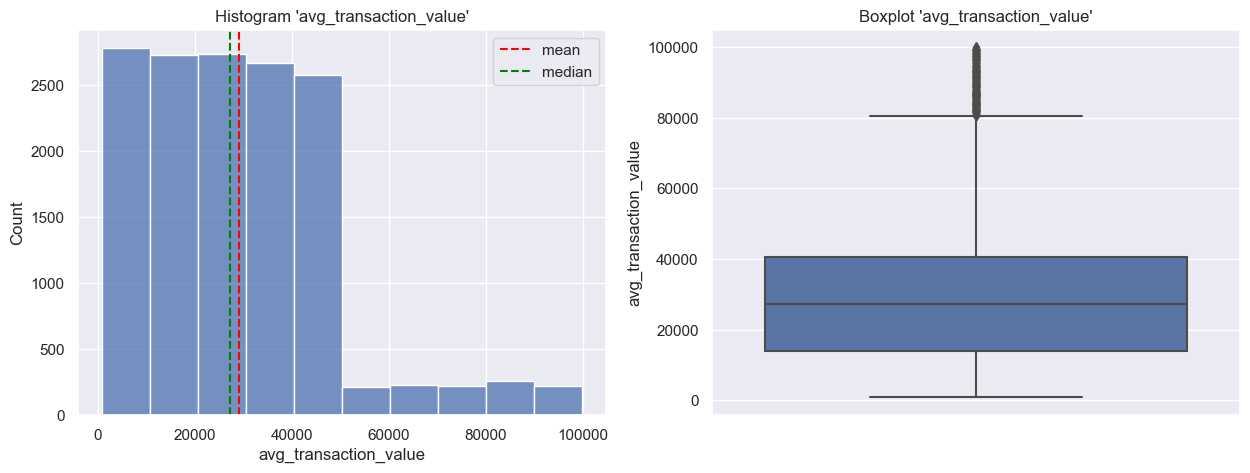

avg_transaction_value Kurtosis: 1.4336342068406207
avg_transaction_value Skewness: 1.0283397020220344
Columns 'avg_transaction_value' is highly right skewed


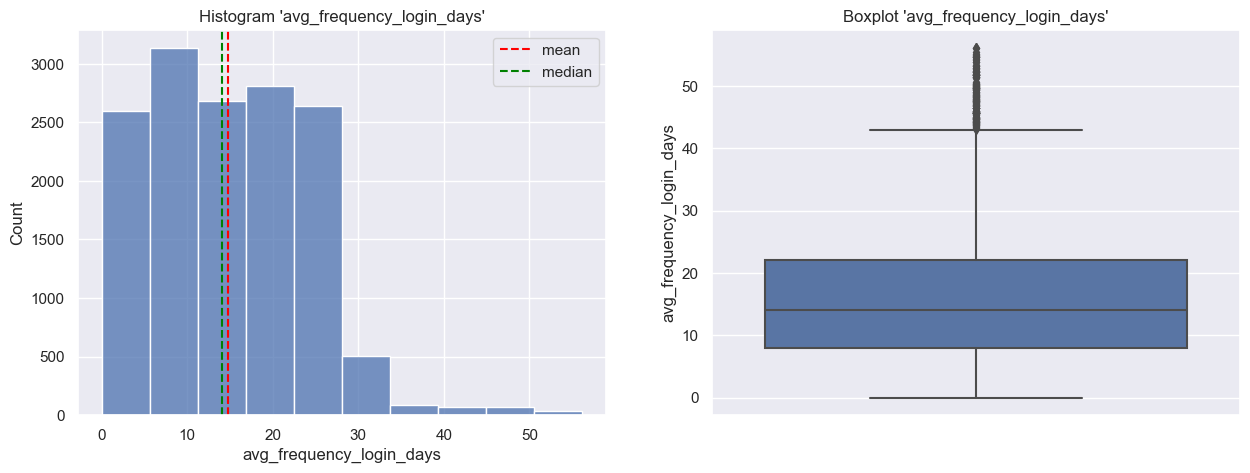

avg_frequency_login_days Kurtosis: 0.22812776086133013
avg_frequency_login_days Skewness: 0.37804710405570013
Columns 'avg_frequency_login_days' is normally distributed


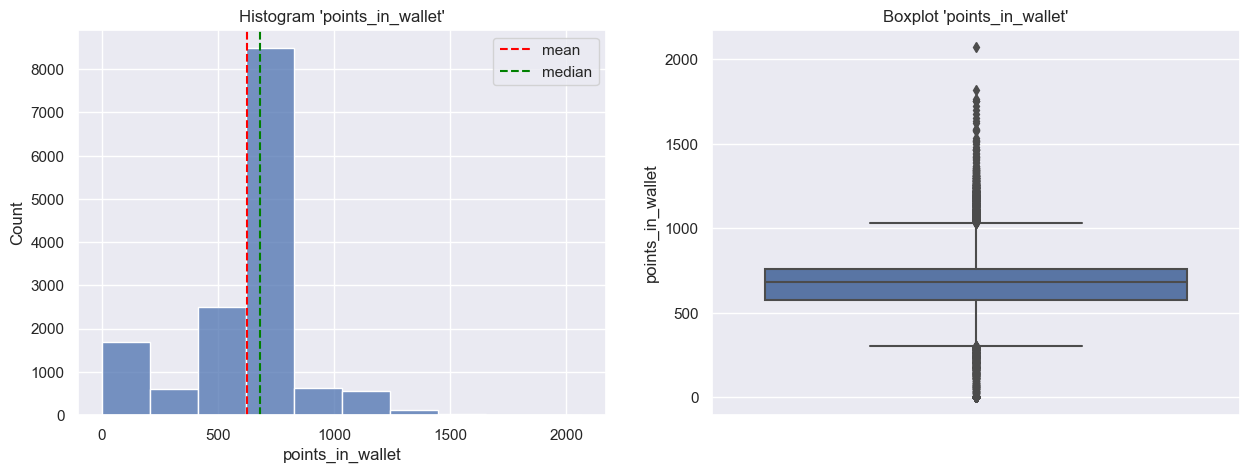

points_in_wallet Kurtosis: 1.3234717505335531
points_in_wallet Skewness: -0.7837715661700096
Columns 'points_in_wallet' is moderately left skewed


In [134]:
# plot semua fitur pada data train untuk melihat distribusi sekaligus outliernya
for i in range(len(num_col)):
    plot_diagnostic(X_train, num_col[i])

In [135]:
# variable container upper dan lower limit semua kolom numerik
upper = []
lower = []

In [136]:
# simpan value upper dan lower ke dalam list yang sudah dibuat sebelumnya
for i in range(len(num_col)):
    upper_, lower_ = find_skewed_boundaries(df=X_train, variable=num_col[i], distance=1.5)
    upper.append(upper_)
    lower.append(lower_)

# simpan value upper dan lower ke dictionary sesuai nama fiturnya dengan format (nama_fitur: upper,lower)
low_up_dict = {}
for i in range(len(num_col)):
    low_up_dict[num_col[i]]=[lower[i],upper[i]]

In [137]:
# menampilan dicionary lower dan upper limit value suatu fitur
low_up_dict

{'avg_transaction_value': [-25797.637500000004, 80453.46250000001],
 'avg_frequency_login_days': [-13.0, 43.0],
 'points_in_wallet': [301.9299999999999, 1033.13]}

In [138]:
#list containing outliers percentage
trimmed_outliers = []
censored_outliers = []
# menghitung dan menampilkan persentase outlier dari tiap fitur
for i in range(len(num_col)):
    num_outlier = X_train[num_col[i]][(X_train[num_col[i]] > upper[i]) | (X_train[num_col[i]] < lower[i])].shape[0]
    outlier_percentage = num_outlier/X_train.shape[0]*100
    if outlier_percentage==0:
        pass
    elif (outlier_percentage>0.0 and outlier_percentage<=5.0):
        trimmed_outliers.append([num_col[i],outlier_percentage])
    else:
        censored_outliers.append([num_col[i],outlier_percentage])

print("Trimmed Outliers Consideration:")
for i in trimmed_outliers:
    print(f'\tPercentage of outlier in \033[1m{i[0]}\033[0m is {i[1]:.2f}%')

print("Censored Outliers Consideration:")
for i in censored_outliers:
    print(f'\tPercentage of outlier in \033[1m{i[0]}\033[0m is {i[1]:.2f}%')

Trimmed Outliers Consideration:
	Percentage of outlier in avg_transaction_value is 3.17%
	Percentage of outlier in avg_frequency_login_days is 0.85%
Censored Outliers Consideration:
	Percentage of outlier in points_in_wallet is 18.24%


Outlier pada `Flight Distance` relatif sedikit maka akan di trim, sedangkan outlier pada `Checkin service`, `Departure Delay in Minutes`, dan `Arrival Delay in Minutes` yang berjulah relatif banyak akan di cap.

#### Trimming
Trimming the outliers by dropping them

In [139]:
# define to be trimmed columns
trimmed_col = [i[0] for i in trimmed_outliers]

# trim the outlier feature by feature
for i in trimmed_col:
    # get outlier index in respective column
    outlier_index = X_train[i][(X_train[i] < low_up_dict[i][0])\
     | (X_train[i] > low_up_dict[i][1])].index
    # drop the outlier
    X_train.drop(index=outlier_index, inplace=True)
    y_train.drop(index=outlier_index, inplace=True)

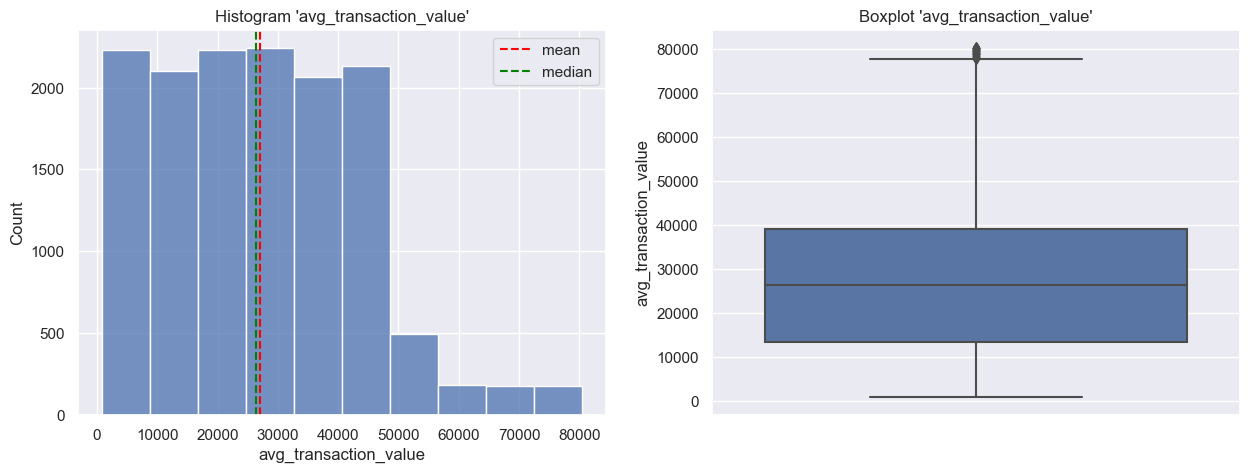

avg_transaction_value Kurtosis: -0.11381611087741916
avg_transaction_value Skewness: 0.45629916177008617
Columns 'avg_transaction_value' is normally distributed


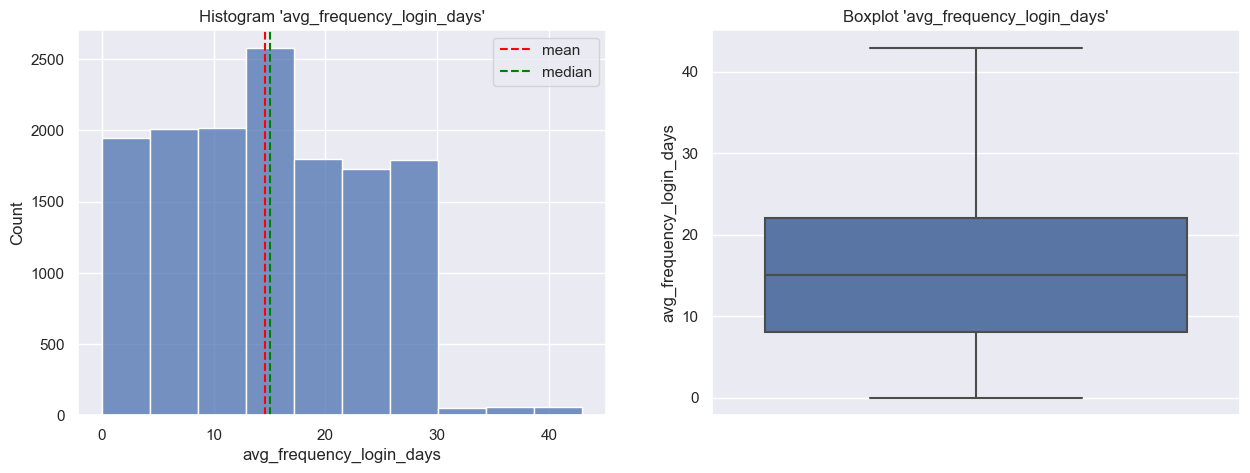

avg_frequency_login_days Kurtosis: -0.8144126753355372
avg_frequency_login_days Skewness: 0.04455255628542188
Columns 'avg_frequency_login_days' is normally distributed


In [140]:
# plot fitur setelah dilakukkan trimming
for i in range(len(trimmed_col)):
    plot_diagnostic(X_train, trimmed_col[i])

#### Censoring/Capping
Capping the outliers by replacing their values with their upper or lower bound threshold.

In [141]:
# define kolom yang ingin di cap
capped_col = [i[0] for i in censored_outliers]

# Create the capper
windsoriser = Winsorizer(capping_method='iqr',
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=capped_col)

# melakukan capping pada data train
data_train = windsoriser.fit_transform(X_train)

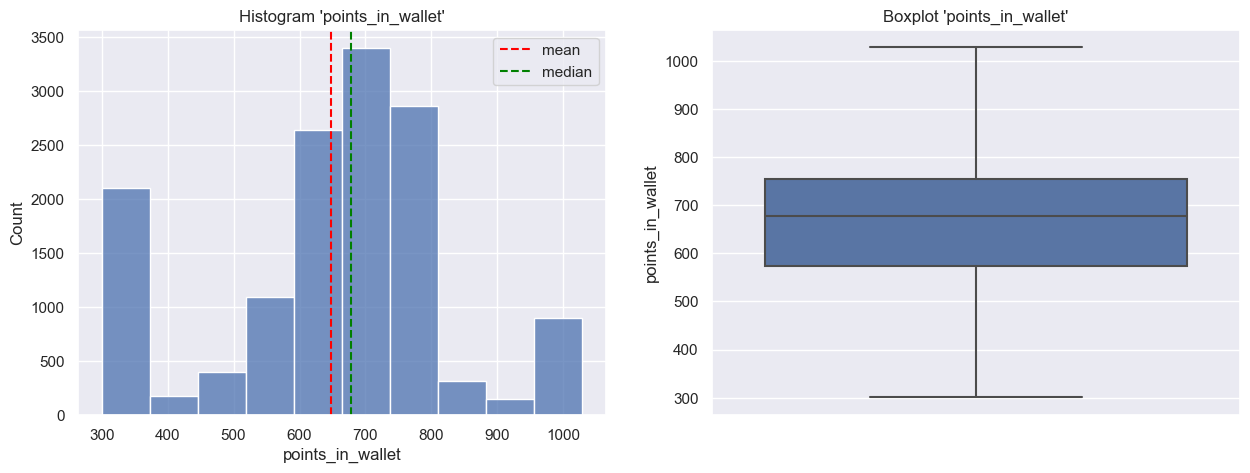

points_in_wallet Kurtosis: 0.023778189178036868
points_in_wallet Skewness: -0.3593427071106058
Columns 'points_in_wallet' is normally distributed


In [142]:
# plot fitur setelah dilakukkan capping
for i in range(len(capped_col)):
    plot_diagnostic(data_train, capped_col[i])

### Data Scaling & Encoding
- `Scaling` is used for making our data as `uniformly scaled` from one features to the other, else there will be bias towards features with higher values.
- `Encoding` is used for `transforming` our categorical data into their numerical form because the model trains on numerical representation.
- Because much of the data is not normally distributed, the `minmax scaler` will be used for `scaling`. 
- `Encoding` will be done on categorical data; for data with 2 unique values and which has `order` or `grade`, it will be encoded with an `OrdinalEncoder`, otherwise we will use a `One-Hot Encoder`.
- We will wrap this process into a column transformer object named "preprocessor" for seamless preprocessing.

In [143]:
# show n unique values
X_train[cat_col].nunique()

membership_category    6
feedback               9
dtype: int64

In [144]:
X_train[cat_col].apply(pd.unique)

membership_category    [Platinum Membership, Premium Membership, Silv...
feedback               [Quality Customer Care, Too many ads, User Fri...
dtype: object

In [145]:
X_train.head()

,membership_category,avg_transaction_value,avg_frequency_login_days,points_in_wallet,feedback
17250,Platinum Membership,79965.01,4.0,714.390000,Quality Customer Care
20282,Premium Membership,49388.39,29.0,736.950000,Too many ads
10388,Silver Membership,54303.38,3.0,265.798918,User Friendly Website
5471,Silver Membership,4464.88,0.0,296.043399,Poor Website
3328,Gold Membership,34581.46,28.0,1041.565579,Poor Website


In [146]:
# # columns to be encoded ordinally
# cat_col_ord = ['joined_through_referral','used_special_discount','offer_application_preference']

In [147]:
# columns to be encoded with one hot
# cat_col_ohe = ['region_category','preferred_offer_types','medium_of_operation','feedback']
cat_col_ohe = ['feedback']

In [148]:
#mendefinisikan kolom/fitur numerik yang akan di transform
num_transformer = MinMaxScaler()
# cat_transformer = OrdinalEncoder()
cat_transformer_membership_category = OrdinalEncoder(categories=[['No Membership','Basic Membership','Premium Membership',\
    'Silver Membership','Gold Membership','Platinum Membership']])
cat_transformer_ohe = OneHotEncoder()
 
# membuat pipeline data preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_col),
        # ("cat1", cat_transformer, cat_col_ord), 
        ("cat2", cat_transformer_membership_category, ['membership_category']),
        ("cat_ohe", cat_transformer_ohe, cat_col_ohe),
    ],
    remainder='passthrough'
)

In [149]:
# transform all data into scaled and encoded values
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)
X_test_transformed = preprocessor.transform(X_test)

In [150]:
# save preprocessor
with open('deployment/models/preprocessor.pkl','wb') as file_1:
    joblib.dump(preprocessor,file_1)

## Tensorflow Data Pipeline
We create data pipeline for the tensorflow models to be fed on, this includes but not limited to: `multiplying`, `shuffling`, and defining the `batch size` of the datasets.

In [151]:
# Define random number for shuffling data
tf.random.set_seed(42)

In [152]:
# Convert to Dataset type
dataset_train = tf.data.Dataset.from_tensor_slices((X_train_transformed,y_train))
dataset_val = tf.data.Dataset.from_tensor_slices((X_val_transformed,y_val))
dataset_test = tf.data.Dataset.from_tensors((X_test_transformed,y_test))

In [153]:
batch_size = 256 # define number of data inputs to be trained per backprop cycle
buffer_size = 4096 # number of buffer size to randomize better
# repeat, shuffle, then batch the data train
dataset_train = dataset_train.repeat(2).shuffle(buffer_size=buffer_size, seed=42).batch(batch_size,drop_remainder=True)
dataset_val = dataset_val.repeat(2).batch(batch_size,drop_remainder=True) # only repeat val the same amount as data train

## ANN Model Definition & Training
Here, we define the `model architecture`, `loss function`, and `metrics` to be evaluated on. After that, we train the model for a given `epochs`.

### Sequential Model
This kind of model architecture constructed layer per layer `sequentially`, hence the name itself.

In [154]:
# define NN sequential model
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(14, name='hidden_1', activation='relu', input_shape=(X_train_transformed.shape[1],)),
    tf.keras.layers.Dense(7, name='hidden_2', activation='relu'),
    tf.keras.layers.Dense(1, name='output', activation='sigmoid')
],name='model_1')

# show model summary
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 14)                196       
                                                                 
 hidden_2 (Dense)            (None, 7)                 105       
                                                                 
 output (Dense)              (None, 1)                 8         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


This ANN model consist of 2 hidden layers, the 1st hidden layer has 14 neuron and 2nd has half the amount from previous layer

In [155]:
# compile model
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=['Recall','Precision','accuracy'])

In [156]:
# fits train data while keeping historical metric losses
history1 = model1.fit(dataset_train, epochs=20, validation_data=dataset_val)

Epoch 1/20


2023-02-03 21:35:11.865264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


107/109 [============================>.] - ETA: 0s - loss: 0.6456 - recall: 0.9385 - precision: 0.6002 - accuracy: 0.6199

2023-02-03 21:35:13.154033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


109/109 [==============================] - 2s 12ms/step - loss: 0.6432 - recall: 0.9348 - precision: 0.6024 - accuracy: 0.6226 - val_loss: 0.5122 - val_recall: 0.7352 - val_precision: 0.7895 - val_accuracy: 0.7524
Epoch 2/20
109/109 [==============================] - 1s 10ms/step - loss: 0.4455 - recall: 0.7490 - precision: 0.8418 - accuracy: 0.7834 - val_loss: 0.4248 - val_recall: 0.7339 - val_precision: 0.8515 - val_accuracy: 0.7882
Epoch 3/20
109/109 [==============================] - 1s 10ms/step - loss: 0.4053 - recall: 0.7487 - precision: 0.8681 - accuracy: 0.7981 - val_loss: 0.4056 - val_recall: 0.7339 - val_precision: 0.8674 - val_accuracy: 0.7967
Epoch 4/20
109/109 [==============================] - 1s 11ms/step - loss: 0.3909 - recall: 0.7489 - precision: 0.8918 - accuracy: 0.8109 - val_loss: 0.3943 - val_recall: 0.7339 - val_precision: 0.8997 - val_accuracy: 0.8131
Epoch 5/20
109/109 [==============================] - 1s 10ms/step - loss: 0.3807 - recall: 0.7496 - precision:

In [157]:
# evaluate on test dataset
model1.evaluate(dataset_test)

1/1 [==============================] - 0s 178ms/step - loss: 0.2970 - recall: 0.7521 - precision: 0.9624 - accuracy: 0.8514


2023-02-03 21:35:34.641590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.29702743887901306,
 0.7521437406539917,
 0.962382435798645,
 0.8513898253440857]

The model achieved 0.77 recall on data train while on data test it achieved 0.76 hence, it is a `good fit`.

In [158]:
# save model
model1.save("deployment/models/seq_model_baseline.h5")

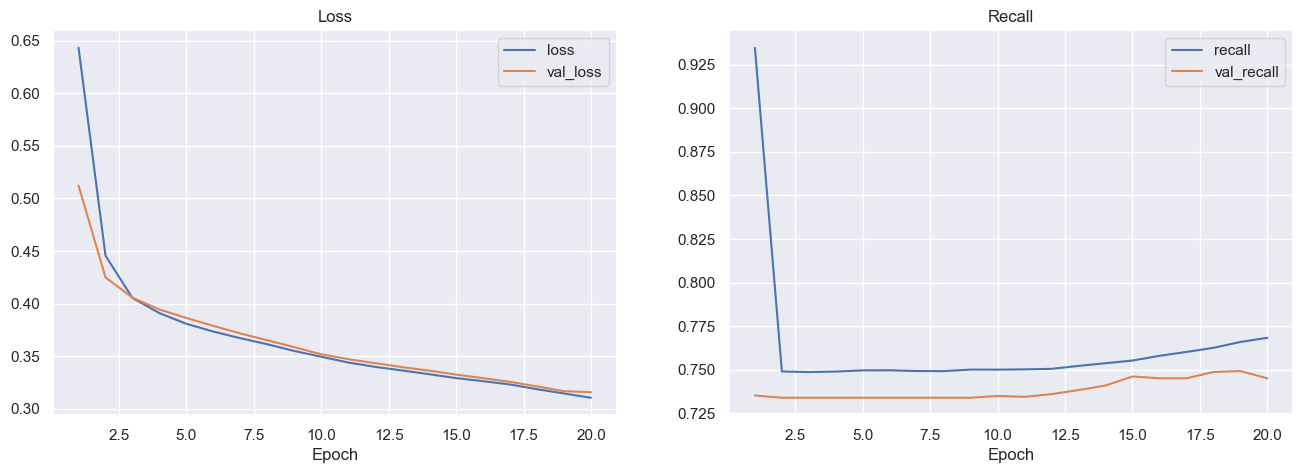

In [159]:
# plot val loss & recall
epoch=len(history1.epoch)

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history1.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history1.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history1.history['recall'],label='recall')
ax[1].plot(range(1,epoch+1),history1.history['val_recall'],label='val_recall')
ax[1].set_title('Recall')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

### Functional Model
This kind of model architecture is constructed by defining each layer, but the order in which the layer is built on top of what other layer is not always consistent.

In [160]:
# define jumlah neuron pada hidden layer
alpha = 10
input_features = X_train_transformed.shape[1]
output_class= 1
hid = int(len(X_train_transformed)/(alpha*(input_features+output_class)))
print(f'Neuron in hidden layer: {hid}')

Neuron in hidden layer: 100


In [161]:
# define NN functional model
input_lyr = tf.keras.layers.Input(name='input',shape=(input_features,))
layers = tf.keras.layers.Dense(hid,name='hidden_1',activation='relu')(input_lyr)
output = tf.keras.layers.Dense(output_class,name='output',activation='sigmoid')(layers)

model2 = tf.keras.models.Model(inputs=input_lyr,outputs=output, name='model_2')

In [162]:
# show model summary
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 13)]              0         
                                                                 
 hidden_1 (Dense)            (None, 100)               1400      
                                                                 
 output (Dense)              (None, 1)                 101       
                                                                 
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


Transformed input consist of 27 features, 1st hidden also consists of 27 features, 2nd hidden consists of 50 and output consists of 1 because of binary class outputs.

In [163]:
# compile model
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['Recall','Precision','accuracy'])

In [164]:
# fit train data while keeping historical metric losses
history2 = model2.fit(dataset_train, epochs=20, validation_data=dataset_val)

Epoch 1/20
  1/109 [..............................] - ETA: 35s - loss: 0.7447 - recall: 0.6351 - precision: 0.4677 - accuracy: 0.3711

2023-02-03 21:35:35.294668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/109 [===========================>..] - ETA: 0s - loss: 0.5384 - recall: 0.7078 - precision: 0.8063 - accuracy: 0.7441

2023-02-03 21:35:36.369100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


109/109 [==============================] - 1s 11ms/step - loss: 0.5327 - recall: 0.7101 - precision: 0.8067 - accuracy: 0.7455 - val_loss: 0.4208 - val_recall: 0.7370 - val_precision: 0.8093 - val_accuracy: 0.7653
Epoch 2/20
109/109 [==============================] - 1s 10ms/step - loss: 0.3998 - recall: 0.7547 - precision: 0.8156 - accuracy: 0.7697 - val_loss: 0.3892 - val_recall: 0.7365 - val_precision: 0.8087 - val_accuracy: 0.7648
Epoch 3/20
109/109 [==============================] - 1s 9ms/step - loss: 0.3795 - recall: 0.7564 - precision: 0.8140 - accuracy: 0.7696 - val_loss: 0.3750 - val_recall: 0.7420 - val_precision: 0.8094 - val_accuracy: 0.7674
Epoch 4/20
109/109 [==============================] - 1s 9ms/step - loss: 0.3672 - recall: 0.7606 - precision: 0.8321 - accuracy: 0.7828 - val_loss: 0.3661 - val_recall: 0.7477 - val_precision: 0.8414 - val_accuracy: 0.7886
Epoch 5/20
109/109 [==============================] - 1s 9ms/step - loss: 0.3610 - recall: 0.7617 - precision: 0.

In [165]:
# evaluate on test dataset
model2.evaluate(dataset_test)

1/1 [==============================] - 0s 173ms/step - loss: 0.3028 - recall: 0.7493 - precision: 0.9602 - accuracy: 0.8490


2023-02-03 21:35:56.168335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.30278322100639343,
 0.7492854595184326,
 0.9602302312850952,
 0.8489822745323181]

The model achieved `0.76 recall score` on data train while on data test it achieved `0.76` hence, the model is `good fit`.

In [166]:
# save model
model2.save("deployment/models/func_model_baseline.h5")

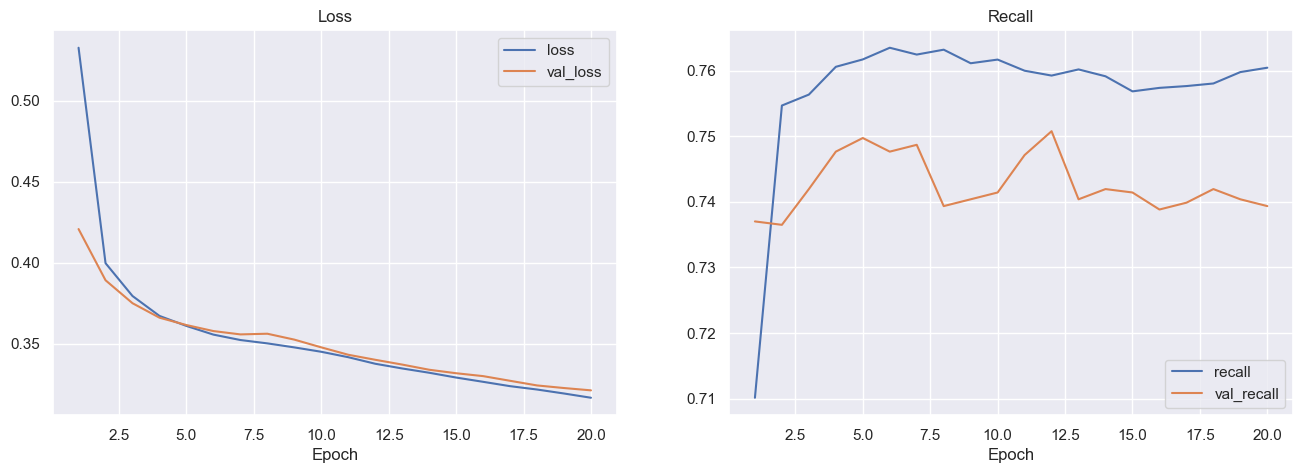

In [167]:
# plot val loss & recall
epoch=len(history2.epoch)

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history2.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history2.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history2.history['recall'],label='recall')
ax[1].plot(range(1,epoch+1),history2.history['val_recall'],label='val_recall')
ax[1].set_title('Recall')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

## ANN Model Improvement
Following that, we attempted to `improve` the model by `changing some parameters`, including but not limited to: the number of `neurons`, the number of `layers`, the `activation function`, the `learning rate`, tweaking the `optimizer`, adding a `batch norm` and/or `dropout` layer, and changing the `kernel initializer` and/or `regularizer`.

### Sequential Model Improvement Attempt
We add `Batch Normalization` after the dense layer, also adding more epochs to `50` with `callback` in case the model converges faster before reaching it's aforementioned epochs.

In [168]:
# define NN sequential model
model1_v2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(14, name='hidden_1', activation='relu', input_shape=(input_features,)),
    tf.keras.layers.BatchNormalization(name='batchnorm_1'), # apply batch norm
    tf.keras.layers.Dense(7, name='hidden_2', activation='relu'),
    tf.keras.layers.BatchNormalization(name='batchnorm_2'),
    tf.keras.layers.Dense(1, name='output', activation='sigmoid')
],name='model_1_v2')

# show model summary
model1_v2.summary()

Model: "model_1_v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 14)                196       
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 14)               56        
 tion)                                                           
                                                                 
 hidden_2 (Dense)            (None, 7)                 105       
                                                                 
 batchnorm_2 (BatchNormaliza  (None, 7)                28        
 tion)                                                           
                                                                 
 output (Dense)              (None, 1)                 8         
                                                                 
Total params: 393
Trainable params: 351
Non-trainable pa

In [169]:
# compile model
model1_v2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['Recall','Precision','accuracy'])

I choose `adam` as the go to default optimizer as most of the researchers and practitioner suggested

In [170]:
# define callback
callbacks1_v2= [
    EarlyStopping(monitor='val_loss', patience= 5, restore_best_weights=True),
    ModelCheckpoint('deployment/models/seq_model_tuned.hdf5', monitor='val_loss', save_best_only=True),
]

In [171]:
# fits train data while keeping historical metric losses
history1_v2 = model1_v2.fit(dataset_train, epochs=50, validation_data=dataset_val, callbacks=callbacks1_v2)

Epoch 1/50


2023-02-03 21:35:56.942000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


106/109 [============================>.] - ETA: 0s - loss: 0.5455 - recall: 0.6813 - precision: 0.7854 - accuracy: 0.7207

2023-02-03 21:35:58.900478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


109/109 [==============================] - 3s 18ms/step - loss: 0.5424 - recall: 0.6831 - precision: 0.7874 - accuracy: 0.7226 - val_loss: 0.5374 - val_recall: 0.7339 - val_precision: 0.8698 - val_accuracy: 0.7980
Epoch 2/50
109/109 [==============================] - 2s 14ms/step - loss: 0.4141 - recall: 0.7509 - precision: 0.8786 - accuracy: 0.8047 - val_loss: 0.4655 - val_recall: 0.8146 - val_precision: 0.7849 - val_accuracy: 0.7804
Epoch 3/50
109/109 [==============================] - 2s 14ms/step - loss: 0.3740 - recall: 0.7518 - precision: 0.9277 - accuracy: 0.8303 - val_loss: 0.4160 - val_recall: 0.8806 - val_precision: 0.7491 - val_accuracy: 0.7773
Epoch 4/50
109/109 [==============================] - 2s 14ms/step - loss: 0.3451 - recall: 0.7526 - precision: 0.9548 - accuracy: 0.8435 - val_loss: 0.3737 - val_recall: 0.8899 - val_precision: 0.7989 - val_accuracy: 0.8205
Epoch 5/50
109/109 [==============================] - 2s 14ms/step - loss: 0.3261 - recall: 0.7609 - precision:

In [172]:
# evaluate on test dataset
model1_v2.evaluate(dataset_test)

1/1 [==============================] - 0s 238ms/step - loss: 0.2515 - recall: 0.9134 - precision: 0.8448 - accuracy: 0.8636


2023-02-03 21:37:14.722433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.25151458382606506,
 0.9134340882301331,
 0.8447884917259216,
 0.8636463284492493]

The model achieved `0.88 recall score` on data train while on data test it achieved `0.86` hence, it is a `good` fit. A `significant improvement` over previous sequential model which only achieves `0.76` recall score.

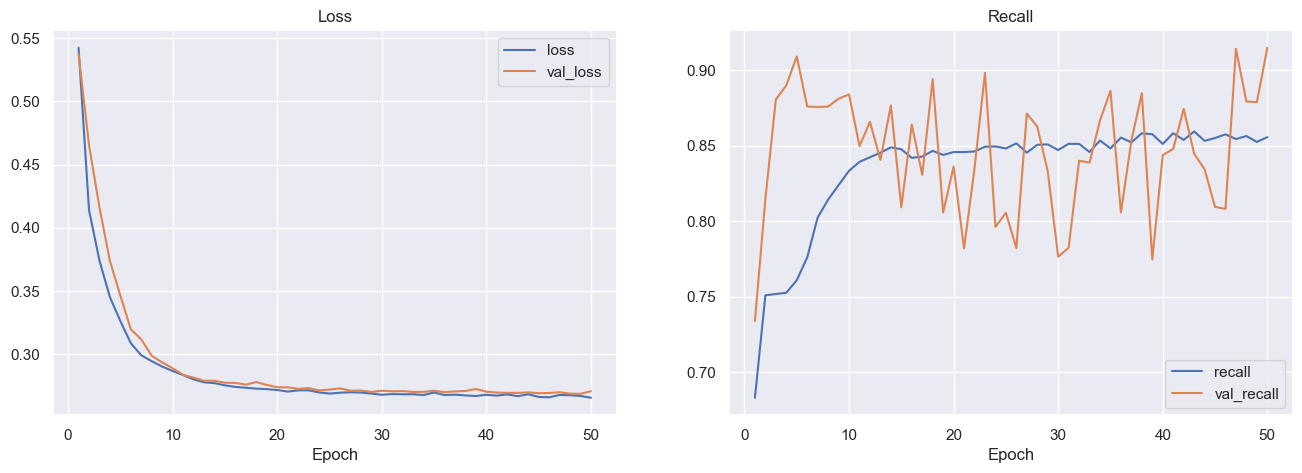

In [173]:
# plot val loss & recall
epoch=len(history1_v2.epoch)

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history1_v2.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history1_v2.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history1_v2.history['recall'],label='recall')
ax[1].plot(range(1,epoch+1),history1_v2.history['val_recall'],label='val_recall')
ax[1].set_title('Recall')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

### Functional Model Improvement Attempt
In addition to the same technique as before in tuning the sequential model, I tried to initialize the weight with `random normal`, `remove the first hidden layer`and add `batch norm` and `dropout` after that.

In [174]:
# define NN functional model
input_lyr = tf.keras.layers.Input(name='input',shape=(X_train_transformed.shape[1],))
layers = tf.keras.layers.Dense(hid,name='hidden_1',activation='relu',kernel_initializer='random_normal')(input_lyr)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dropout(0.25)(layers)
output = tf.keras.layers.Dense(1,name='output',activation='sigmoid',kernel_initializer='random_normal')(layers)

model2_v2 = tf.keras.models.Model(inputs=input_lyr,outputs=output, name='model_2_v2')
model2_v2.summary()

Model: "model_2_v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 13)]              0         
                                                                 
 hidden_1 (Dense)            (None, 100)               1400      
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 output (Dense)              (None, 1)                 101       
                                                                 
Total params: 1,901
Trainable params: 1,701
Non-trainable params: 200
____________________________________________________

In [175]:
opt = tf.keras.optimizers.Adam(
    learning_rate=0.0005,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    name="Adam",
)

In [176]:
# compile model
model2_v2.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['Recall','Precision','accuracy']
)

In [177]:
# define callbacks
callbacks2_v2= [
    EarlyStopping(monitor='val_loss', patience= 5, restore_best_weights=True),
    ModelCheckpoint('deployment/models/func_model_tuned.hdf5', monitor='val_loss', save_best_only=True),
]

In [178]:
# fits train data while keeping historical metric losses
history2_v2 = model2_v2.fit(dataset_train, epochs=50, validation_data=dataset_val,callbacks=callbacks2_v2)

Epoch 1/50


2023-02-03 21:37:15.467940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


106/109 [============================>.] - ETA: 0s - loss: 0.4774 - recall: 0.7208 - precision: 0.8006 - accuracy: 0.7459

2023-02-03 21:37:17.041144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


109/109 [==============================] - 2s 15ms/step - loss: 0.4754 - recall: 0.7210 - precision: 0.8006 - accuracy: 0.7463 - val_loss: 0.6076 - val_recall: 0.8744 - val_precision: 0.7342 - val_accuracy: 0.7624
Epoch 2/50
109/109 [==============================] - 1s 12ms/step - loss: 0.3822 - recall: 0.7610 - precision: 0.8381 - accuracy: 0.7863 - val_loss: 0.5466 - val_recall: 0.9886 - val_precision: 0.6930 - val_accuracy: 0.7585
Epoch 3/50
109/109 [==============================] - 1s 11ms/step - loss: 0.3664 - recall: 0.7700 - precision: 0.8674 - accuracy: 0.8079 - val_loss: 0.4737 - val_recall: 0.9200 - val_precision: 0.7307 - val_accuracy: 0.7748
Epoch 4/50
109/109 [==============================] - 1s 12ms/step - loss: 0.3587 - recall: 0.7691 - precision: 0.8964 - accuracy: 0.8232 - val_loss: 0.4061 - val_recall: 0.8204 - val_precision: 0.7954 - val_accuracy: 0.7900
Epoch 5/50
109/109 [==============================] - 1s 11ms/step - loss: 0.3523 - recall: 0.7665 - precision:

In [179]:
# evaluate on test dataset
model2_v2.evaluate(dataset_test)

1/1 [==============================] - 0s 211ms/step - loss: 0.2334 - recall: 0.9224 - precision: 0.9235 - accuracy: 0.9175


2023-02-03 21:38:18.376259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.23340816795825958,
 0.9224173426628113,
 0.923548698425293,
 0.9174874424934387]

The model achieved `0.89 recall score` on data train while on data test it achieved `0.89` hence, it is a `good` fit. This is quite a significant improvement compared to previous functional model which only achieves `0.76 recall on train set` and `0.76 on test set`.

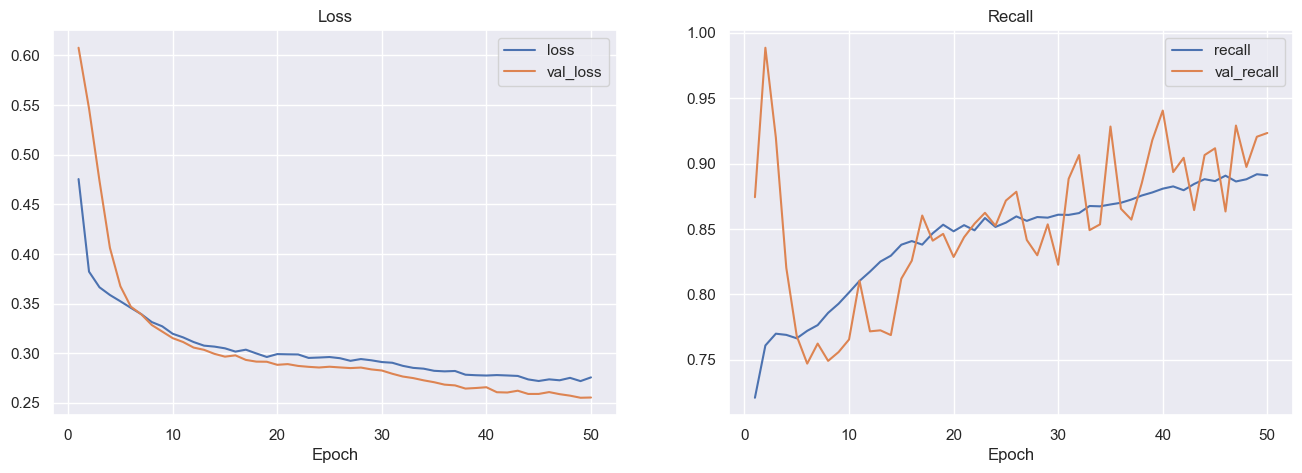

In [180]:
# plot val loss & recall
epoch=len(history2_v2.epoch)

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history2_v2.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history2_v2.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history2_v2.history['recall'],label='recall')
ax[1].plot(range(1,epoch+1),history2_v2.history['val_recall'],label='val_recall')
ax[1].set_title('Recall')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

## Conclusion
- Deep learning models can `predict` whether or not a customer will churn.
- Maximizing the `recall` score is `critical` because there is a pressing need to `retain existing customers`, which we accomplish by `minimizing` `false negative` predictions. 
- By adding a `batch norm` layer to the sequential model, the model gains an additional `10% improvement` in the recall score, reaching `0.87` instead of `0.75` in the baseline sequential model.
- By `removing` the `first hidden layer`, `adding` the `batch norm`, and the `dropout layer` to the functional model, the model `fixes` its `overfitting` problem and improves its recall score by `3%`, reaching `0.88` instead of `0.85` in the baseline functional model.
- One of the perks of `callbacks` is that they are useful to stop unnecessary training if the model happens to converge earlier than expected.
- The best model from this experiment is a tuned functional model with an `88% recall score`, and it will be used in the deployment afterwards.

## Further Improvement
- Strict feature selection might be needed to improve the model
- Tweaking the optimizer hyperparameter may help the model perform better.